In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 3

In [3]:
# Define the function
def rhs_ivp(x, y, ep, gamma):
    f1 = y[1]
    f2 = ((gamma*np.abs(y[0])**2)+x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [4]:
# Define some constants 
K = 1
L = 3
ep_start = 0
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = -0.05

ep = ep_start
dep = K/100

In [5]:
# Define our initial conditions 
A = 0.000001 # This will change
# y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])

In [6]:
A15 = np.array([])
Eigenfunctions = {}

for modes in range(2):
    ep = ep_start
    dep = K/100
    
    for j in range(1000): # using for loop to make sure it stops. 
        # update initial condition
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) # same bc as problem 1 and 2. 
#         boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
# Norm Shooting 
        
        #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
        if boundary < tol and norm_tol < tol:
            break
        else:
            A = A/np.sqrt(norm)
#             print('norm:', norm)
#             print('A:', A)
             
# BC Shooting
        
        # update initial condition with new A 
        y0 = np.array([A,((((K*L**2) - ep))**.5)*(A)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # define/compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)) #norm
        norm_tol = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1)
        boundary = np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1])
        
        if boundary < tol and norm_tol < tol:
            break
            
        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else:
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge
    
    ep_start = ep + 0.1 
    A = A

    A15 = np.append(A15, ep)
    Eigenfunctions[modes] = y_sol

In [7]:
A15 = A15.reshape(1,2)
A15

array([[0.97994629, 2.98324341]])

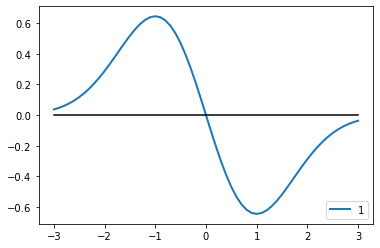

In [8]:
plt.plot(sol.t, y_sol, linewidth=2, label = modes)
plt.plot(sol.t, 0*sol.t, 'k')
plt.legend(loc="lower right")

In [9]:
A13 = Eigenfunctions[0]
A14 = Eigenfunctions[1]

In [10]:
A13

array([0.008511  , 0.01128725, 0.01490342, 0.01954599, 0.0254252 ,
       0.03277117, 0.04184308, 0.05292374, 0.06628958, 0.0822095 ,
       0.10093409, 0.1227037 , 0.14770869, 0.17604875, 0.20773277,
       0.24267894, 0.28073224, 0.32153215, 0.36455597, 0.40917894,
       0.45467417, 0.50021272, 0.54486352, 0.58759378, 0.62738712,
       0.6631755 , 0.6939366 , 0.71881954, 0.73714495, 0.74840487,
       0.75226284, 0.74855384, 0.73730925, 0.71893636, 0.69406218,
       0.6634059 , 0.6277779 , 0.5880798 , 0.5453044 , 0.50053573,
       0.45491945, 0.40938681, 0.36474601, 0.32171455, 0.28090613,
       0.24283067, 0.20786529, 0.17617367, 0.1478229 , 0.12279871,
       0.10100457, 0.08226172, 0.06632586, 0.05295322, 0.04187852,
       0.03280299, 0.0254337 , 0.01954786, 0.01491958, 0.01130782,
       0.00852563])

In [11]:
A14

array([ 3.68115020e-02,  4.70025675e-02,  5.97402269e-02,  7.53874192e-02,
        9.42827744e-02,  1.16728462e-01,  1.42964637e-01,  1.73170375e-01,
        2.07371278e-01,  2.45396371e-01,  2.86878102e-01,  3.31279205e-01,
        3.77935430e-01,  4.25516738e-01,  4.72495967e-01,  5.17251615e-01,
        5.58067833e-01,  5.93134430e-01,  6.20546869e-01,  6.38306272e-01,
        6.44593553e-01,  6.38051400e-01,  6.17470706e-01,  5.82252598e-01,
        5.32418065e-01,  4.68607958e-01,  3.92047881e-01,  3.04479635e-01,
        2.08158074e-01,  1.05661956e-01, -1.16315965e-04, -1.05970689e-01,
       -2.08524766e-01, -3.04962253e-01, -3.92557179e-01, -4.69057432e-01,
       -5.32748789e-01, -5.82454912e-01, -6.17561375e-01, -6.38154462e-01,
       -6.44834277e-01, -6.38599062e-01, -6.20844508e-01, -5.93363748e-01,
       -5.58201723e-01, -5.17285953e-01, -4.72490552e-01, -4.25557334e-01,
       -3.78094575e-01, -3.31576935e-01, -2.87224788e-01, -2.45762833e-01,
       -2.07702141e-01, -

In [12]:
A15

array([[0.97994629, 2.98324341]])